# Sklearn

## sklearn.linear_model

In [1]:
from matplotlib.colors import ListedColormap
from sklearn import cross_validation, datasets, linear_model, metrics

import numpy as np

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Линейная регрессия

#### Генерация данных

In [3]:
data, target, coef = datasets.make_regression(n_features = 2, n_informative = 1, n_targets = 1, 
                                              noise = 5., coef = True, random_state = 2)

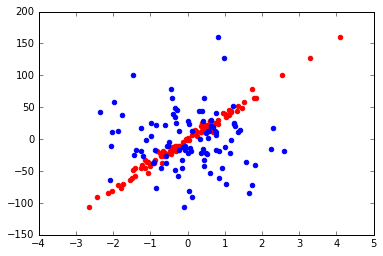

In [4]:
pylab.scatter(map(lambda x:x[0], data), target, color = 'r')
pylab.scatter(map(lambda x:x[1], data), target, color = 'b')

In [5]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(data, target,  
                                                                                     test_size = 0.3)

#### LinearRegression

In [6]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(train_data, train_labels)
predictions = linear_regressor.predict(test_data)

In [7]:
print test_labels

[ 160.09441244  -45.38589148  -71.3715844    27.83791274  -32.71074998
  -16.30914909  -44.51417742  126.64909941   11.06961035  -61.47026695
  -26.87743177   11.74073026  -37.31870104   17.64282734    1.72644759
    5.86887774   64.19559505   12.74038341   22.2276832   -57.46293828
  -91.477377    -10.06708677  -32.92158843  -42.44469577   12.47089016
  -24.77820218   22.13032804   -4.38652971  -19.16792315   29.8208999 ]


In [8]:
print predictions

[  1.58546065e+02  -4.46836974e+01  -7.12462291e+01   2.33762959e+01
  -4.38296671e+01  -1.19891919e+01  -5.53526021e+01   1.26691797e+02
   2.49111991e+01  -5.70054442e+01  -2.85928232e+01   1.47980658e+01
  -3.56535191e+01   2.24379186e+01  -6.34413973e-02   4.90058602e+00
   7.06261249e+01   6.56694873e+00   1.83027670e+01  -5.53294665e+01
  -9.42417624e+01  -1.07152135e+01  -3.44148849e+01  -3.95228074e+01
   2.02873794e+01  -2.75964601e+01   1.99128782e+01  -5.21284602e+00
  -1.03400669e+01   3.19788482e+01]


In [9]:
metrics.mean_absolute_error(test_labels, predictions)

3.8869823500981111

In [10]:
linear_scoring = cross_validation.cross_val_score(linear_regressor, data, target, scoring = 'mean_absolute_error', 
                                                  cv = 10)
print 'mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std())

mean: -4.07007149878, std: 1.07371044929


In [11]:
scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better = True)

In [12]:
linear_scoring = cross_validation.cross_val_score(linear_regressor, data, target, scoring=scorer, 
                                                  cv = 10)
print 'mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std())

mean: 4.07007149878, std: 1.07371044929


In [13]:
coef

array([ 38.07925837,   0.        ])

In [14]:
linear_regressor.coef_

array([ 38.55540458,   0.70874569])

In [15]:
print "y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1])

y = 38.08*x1 + 0.00*x2


In [16]:
print "y = {:.2f}*x1 + {:.2f}*x2".format(linear_regressor.coef_[0], linear_regressor.coef_[1])

y = 38.56*x1 + 0.71*x2


#### Lasso

In [17]:
lasso_regressor = linear_model.Lasso(random_state = 3)
lasso_regressor.fit(train_data, train_labels)
lasso_predictions = lasso_regressor.predict(test_data)

In [18]:
lasso_scoring = cross_validation.cross_val_score(lasso_regressor, data, target, scoring = scorer, cv = 10)
print 'mean: {}, std: {}'.format(lasso_scoring.mean(), lasso_scoring.std())

mean: 4.15447824667, std: 1.0170354385


In [19]:
print lasso_regressor.coef_

[ 37.45817284   0.        ]


In [20]:
print "y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1])

y = 38.08*x1 + 0.00*x2


In [21]:
print "y = {:.2f}*x1 + {:.2f}*x2".format(lasso_regressor.coef_[0], lasso_regressor.coef_[1])

y = 37.46*x1 + 0.00*x2
